# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [259]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [260]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,670,95,51,96,196,63,9,190,35,22,161,208,543,235,68,13,0,191,198
1,419,93,34,72,144,56,6,133,50,18,123,158,263,125,63,5,20,200,206
2,601,93,39,78,164,66,8,139,48,18,140,157,290,126,64,4,7,201,208
3,54,101,56,104,185,53,6,257,26,28,168,275,956,230,83,5,26,180,184
4,451,94,37,74,169,59,7,162,41,20,133,178,394,130,63,6,6,198,204
5,210,94,39,89,194,62,9,172,38,21,135,191,444,121,63,4,23,201,209
6,436,93,42,64,123,51,7,135,51,18,144,164,262,155,78,16,12,185,185
7,314,90,42,63,126,55,7,152,45,19,142,173,336,173,81,0,15,180,184
8,635,97,41,62,133,56,7,130,52,18,143,158,247,157,78,5,7,184,186
9,499,102,54,98,167,53,10,217,31,24,174,228,692,223,72,0,31,187,198


Methods `describe` and `info` deliver some useful information.

In [261]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.160291,93.486339,44.714026,81.877960,168.304189,61.606557,8.570128,168.255009,41.041894,20.546448,147.599271,188.063752,436.444444,174.256831,72.568306,6.326047,12.477231,188.712204,195.324226
std,244.271716,8.284092,6.102546,15.475364,33.395119,8.016977,4.749673,32.687815,7.745264,2.543801,14.427382,30.729179,173.781228,32.588811,7.529345,4.997926,8.860946,6.183408,7.459659
min,4.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,209.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,428.000000,92.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,362.000000,172.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,635.000000,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,196.000000,46.000000,23.000000,158.000000,216.000000,578.000000,198.000000,76.000000,9.000000,19.000000,193.000000,200.000000
max,845.000000,119.000000,59.000000,110.000000,322.000000,133.000000,52.000000,261.000000,61.000000,28.000000,188.000000,288.000000,998.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [262]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [263]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

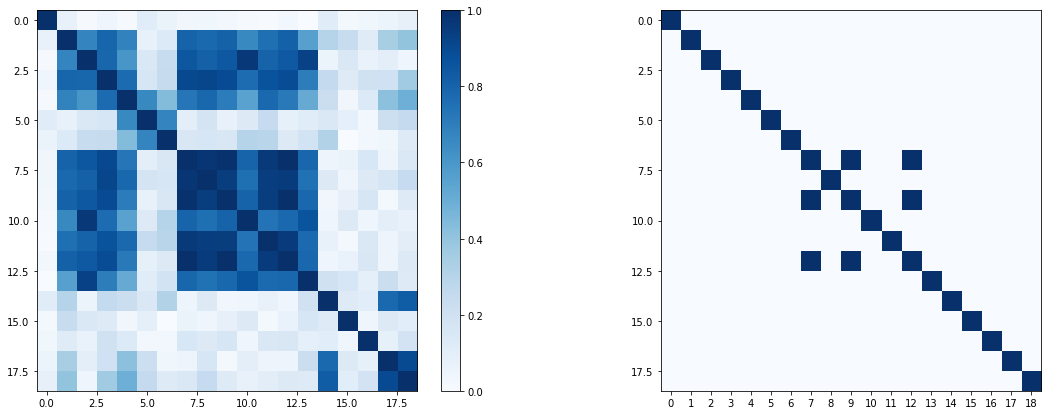

In [264]:
corr_matrix = X_train_pd.corr()

fig, (ax1, ax3) = plt.subplots(figsize=(19, 7), ncols=2)

pos = ax1.imshow(abs(corr_matrix), cmap='Blues', vmin=0.0, vmax=1.0)
fig.colorbar(pos, ax=ax1)

plt.xticks(np.arange(0, 19))
pos3 = ax3.imshow(abs(corr_matrix) > 0.99, cmap='Blues')
plt.show()

In [265]:
thrown_inds = [7, 9]
X_train_new = np.delete(X_train, thrown_inds, axis=-1)
X_test_new = np.delete(X_test, thrown_inds, axis=-1)

The features $7$, $9$ and $12$ are highly correlated, so we need to throw away any two of them.

Futhermore, classes type is string. So, we should tranform it to int type using following functions to reach this property.

In [266]:
y_train_new = pd.DataFrame(y_train, columns=['car']).groupby("car").ngroup().to_numpy()
y_test_new = pd.DataFrame(y_test, columns=['car']).groupby("car").ngroup().to_numpy()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'`, `tol=1e-3` and ` max_iter=500`.*

In [267]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scikitplot

In [268]:
pipe = Pipeline([
      ("Scaler", StandardScaler()), 
      ("Logistic", LogisticRegression(
          multi_class='multinomial',
          solver='saga',
          tol=1e-3,
          max_iter=500
      ))
    ])

params = {
    "Logistic__penalty": ["l1", "l2"], 
    "Logistic__C": np.linspace(0.1, 15.1, 30, endpoint=False)
}

In [269]:
def find_params(scr="accuracy"):
    clf = GridSearchCV(
        pipe, 
        params, 
        scoring=scr,
        refit=scr,
        cv=5
    )

    clf.fit(X_train_new, y_train_new)
    return clf

In [270]:
clf = find_params("f1_weighted")

Scoring: f1_weighted
Best parameters: {'Logistic__C': 4.1, 'Logistic__penalty': 'l1'}


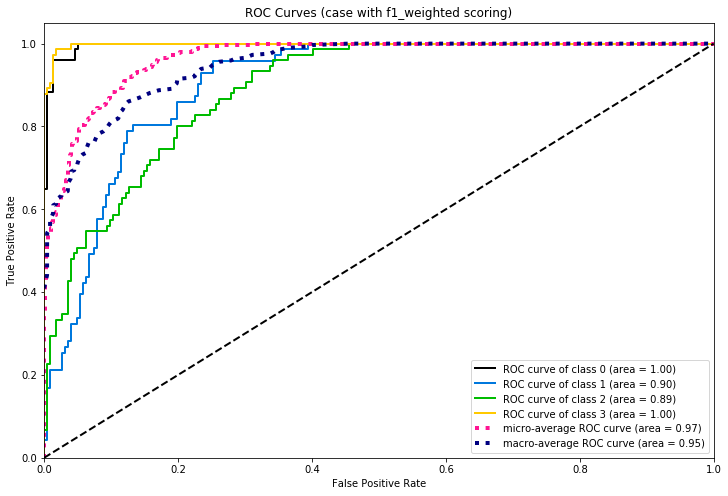

In [271]:
print("Scoring: {}\nBest parameters: {}".format("f1_weighted", clf.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("f1_weighted")
)

In [272]:
clf2 = find_params("accuracy")

Scoring: accuracy
Best parameters: {'Logistic__C': 1.1, 'Logistic__penalty': 'l1'}


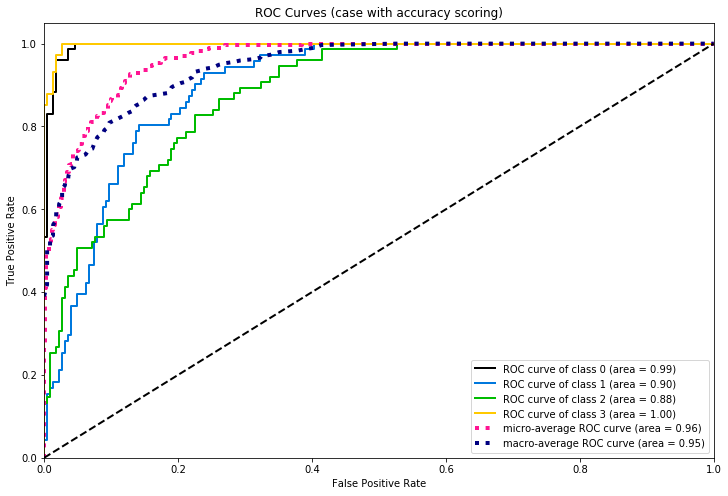

In [273]:
print("Scoring: {}\nBest parameters: {}".format("accuracy", clf2.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf2.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("accuracy")
)

From the plots we can see that $AUC > 0.9$ and it is the same in both cases. Therefore, we can assume that  there is definitely not someone better or worse between the two scores.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [274]:
from sklearn.decomposition import PCA

In [275]:
pca = PCA(n_components=X_train_new.shape[1])
scaled_data = StandardScaler().fit_transform(X_train_new)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

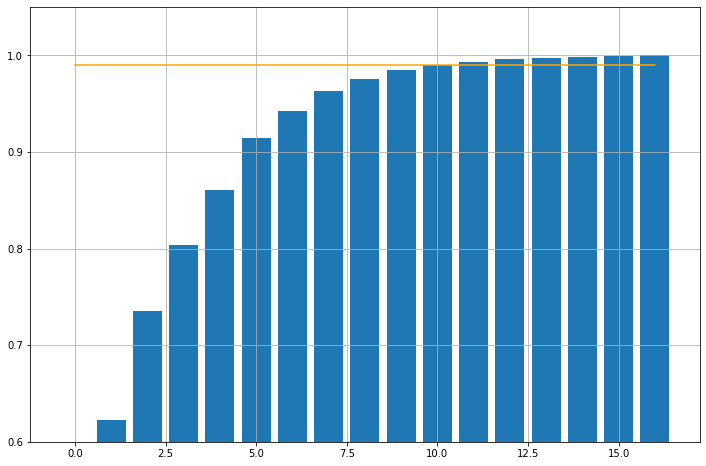

In [276]:
plt.figure(figsize=(12, 8))
plt.ylim(0.6, 1.05)
plt.bar(np.arange(17), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(17), np.ones(17) * 0.99, color="orange")
plt.grid()
plt.show()

In [277]:
(pca.explained_variance_ratio_.cumsum() <= 0.99).sum()

10

So, we should leave only first 10 features because they give $0.99$ of variance.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [278]:
pipe = Pipeline([
     ("Scaler", StandardScaler()), 
     ("PCA", PCA(n_components=10)),
     ("Logistic", LogisticRegression(
         multi_class='multinomial', 
         solver='saga',
         tol=1e-3,
         max_iter=500
         ))
    ])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [279]:
params = {
    "Logistic__penalty": ["l1", "l2"], 
    "Logistic__C": np.linspace(0.1, 15.1, 30, endpoint=False)
}

def find_params(scr="accuracy"):
    clf = GridSearchCV(
        pipe, 
        params, 
        scoring=scr,
        refit=scr,
        cv=5
    )

    clf.fit(X_train_new, y_train_new)
    return clf

Scoring: f1_weighted
Best parameters: {'Logistic__C': 0.6, 'Logistic__penalty': 'l2'}


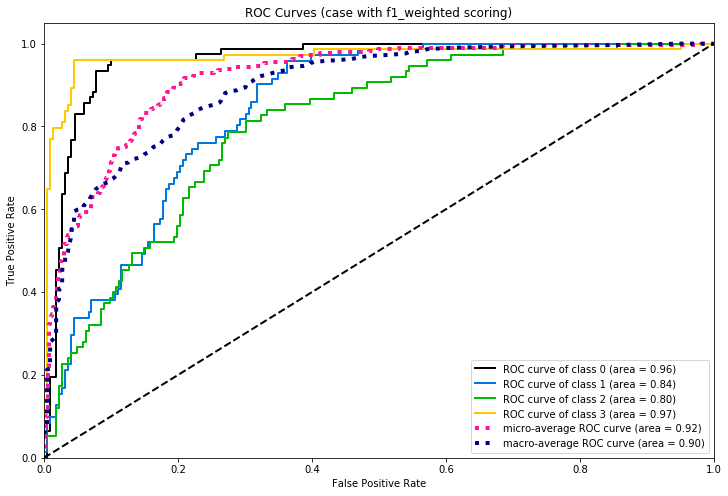

In [280]:
clf = find_params("f1_weighted")
print("Scoring: {}\nBest parameters: {}".format("f1_weighted", clf.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("f1_weighted")
)

Scoring: accuracy
Best parameters: {'Logistic__C': 0.6, 'Logistic__penalty': 'l2'}


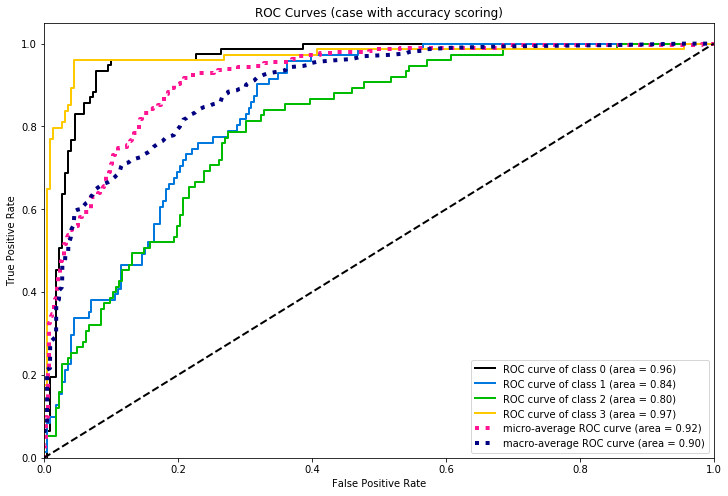

In [281]:
clf2 = find_params("accuracy")
print("Scoring: {}\nBest parameters: {}".format("accuracy", clf2.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf2.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("accuracy")
)

Same, from the plots $AUC \geq 0.9$ and it is the same in both cases. Therefore, we can assume that  there is definitely not someone better or worse between the two scores.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [282]:
from sklearn.tree import DecisionTreeClassifier

In [283]:
pipe = Pipeline([
      ("Scaler", StandardScaler()), 
      ("Tree", DecisionTreeClassifier())
     ])

params = {
    "Tree__max_depth": np.arange(1, 21)
}

def find_params(scr="accuracy"):
    clf = GridSearchCV(
        pipe, 
        params, 
        scoring=scr,
        refit=scr,
        cv=5
    )

    clf.fit(X_train_new, y_train_new)
    return clf

In [284]:
clf = find_params("f1_weighted")

Scoring: f1_weighted
Best parameters: {'Tree__max_depth': 12}


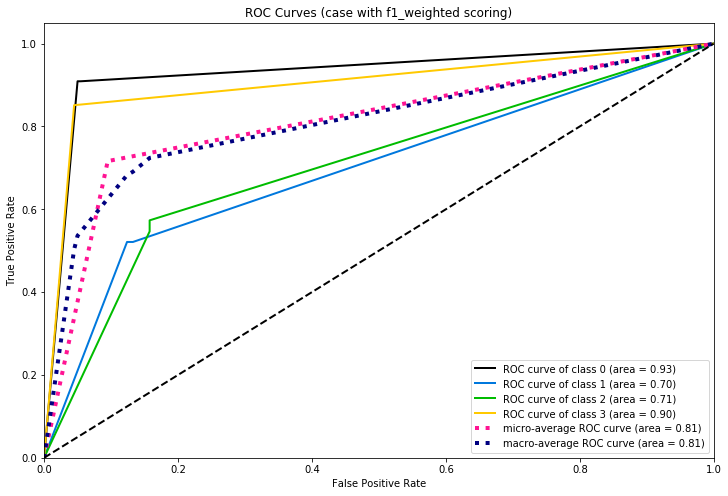

In [285]:
print("Scoring: {}\nBest parameters: {}".format("f1_weighted", clf.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("f1_weighted")
)

In [286]:
clf2 = find_params("accuracy")

Scoring: accuracy
Best parameters: {'Tree__max_depth': 19}


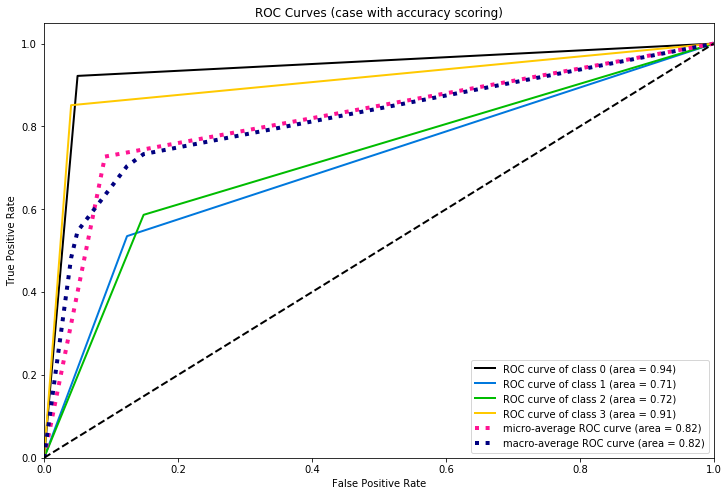

In [287]:
print("Scoring: {}\nBest parameters: {}".format("accuracy", clf2.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf2.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("accuracy")
)

Model is good enough because AUC is big enough (from $0.81$ to $0.86$). 

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [224]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [251]:
logreg = LogisticRegression
logreg_params = {
    "multi_class": 'multinomial',
    "solver": 'saga',
    "tol": 1e-3,
    "max_iter": 500,
    "C": 3.6,
    "penalty": 'l1'
}

tree = DecisionTreeClassifier
tree_params = {"max_depth": 7}

In [252]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

In [253]:
def create_bagging_ensemble(base_clf, params, estimators_max_count, x_train_data):
    indices = np.arange(x_train_data.shape[0])
    bootstrap_samples = np.random.choice(indices, size=(estimators_max_count+1, data.shape[0]), replace=True)
    X_bootsample = np.array([x_train_data[idx] for idx in bootstrap_samples])
    y_bootsample = np.array([y_train_new[idx] for idx in bootstrap_samples])
    
    ensemble = []
    for i in range(estimators_max_count+1):
        clf = base_clf(**params)
        clf.fit(X_bootsample[i], y_bootsample[i])
        ensemble.append(clf)
    
    return ensemble


def make_predictions(ensemble, models_numbers):
    proba_predicts = np.array([model.predict_proba(X_test_scaled) for model in ensemble])
    aver_proba_predicts = np.cumsum(proba_predicts, axis=0) / (1 + np.arange(proba_predicts.shape[0]).reshape(-1, 1, 1))
    
    predicts = {}
    for n in models_numbers:
        predicts[n] = aver_proba_predicts[n]
    return predicts


def calc_scores(y_true, y_proba_pred):
    y_pred = y_proba_pred.argmax(axis=-1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_true, y_pred)
    return {"f1": f1, "acc": acc}

In [255]:
logreg_ensemble_scaled = create_bagging_ensemble(
    logreg, logreg_params, estimators_max_count=100, x_train_data=X_train_scaled
)
tree_ensemble_scaled = create_bagging_ensemble(
    tree, tree_params, estimators_max_count=100, x_train_data=X_train_scaled
)

In [256]:
estimators_count = np.arange(2, 101, 2)
logreg_proba_predicts_scaled = make_predictions(logreg_ensemble_scaled, estimators_count)
tree_proba_predicts_scaled = make_predictions(tree_ensemble_scaled, estimators_count)

logreg_acc_score_scaled = []
logreg_f1_score_scaled = []
tree_acc_score_scaled = []
tree_f1_score_scaled = []

for n in estimators_count:  
    logreg_score_n = calc_scores(y_test_new, logreg_proba_predicts_scaled[n])  
    logreg_acc_score_scaled.append(logreg_score_n["acc"])
    logreg_f1_score_scaled.append(logreg_score_n["f1"])
                                       
    tree_score_n = calc_scores(y_test_new, tree_proba_predicts_scaled[n])
    tree_acc_score_scaled.append(tree_score_n["acc"])
    tree_f1_score_scaled.append(tree_score_n["f1"])


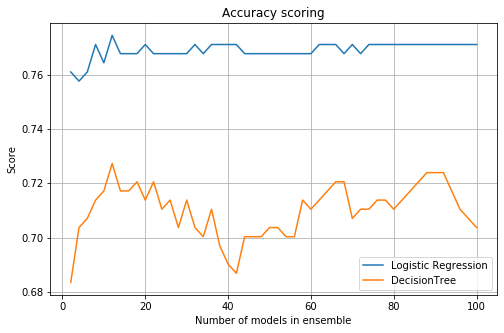

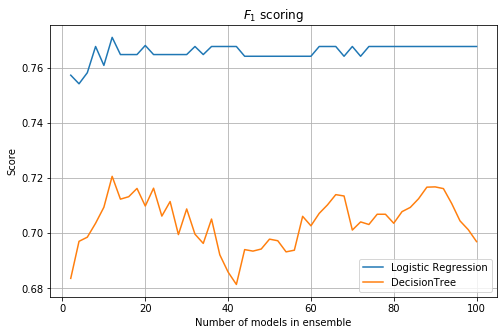

In [257]:
plt.figure(figsize=(8, 5))
plt.title("Accuracy scoring")
plt.xlabel("Number of models in ensemble")
plt.ylabel("Score")
plt.plot(estimators_count, logreg_acc_score_scaled, label='Logistic Regression')
plt.plot(estimators_count, tree_acc_score_scaled, label='DecisionTree')
plt.grid()
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(8, 5))
plt.title("$F_1$ scoring")
plt.xlabel("Number of models in ensemble")
plt.ylabel("Score")
plt.plot(estimators_count, logreg_f1_score_scaled, label='Logistic Regression')
plt.plot(estimators_count, tree_f1_score_scaled, label='DecisionTree')
plt.grid()
plt.legend(loc="best")
plt.show()

Optimal number of models is from $10$ to $15$ because score curve reaches its maximum value for the first time with the number of models in this range ($10$ in case of DecisionTree and $14$ in case of Logistic Regression) and then keeps at about the same level in both cases of models.

I think that hyperparameters computed in 2.5 can be not optimal for ensemble of trees because maximal depth and number of trees can influence each other and if we examine these hyperparameters together, then we may get very different results. Computed number of trees is optimal for trees with max_depth $= 7$, but for other max_depth this hyperparameter may be different.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
pipe = Pipeline(
     [
      ("Scaler", StandardScaler()), 
      ("Random_forest", RandomForestClassifier())
     ]
)

params = {
    "Random_forest__max_depth": np.arange(1, 21),
    "Random_forest__n_estimators": np.arange(1, 51)
}

def find_params(scr="accuracy"):
    clf = GridSearchCV(
        pipe, 
        params, 
        scoring=scr,
        refit=scr,
        cv=5
    )

    clf.fit(X_train_new, y_train_new)
    return clf

In [290]:
clf = find_params("f1_weighted")

Scoring = f1_weighted
Best parameters: {'Random_forest__max_depth': 18, 'Random_forest__n_estimators': 14}


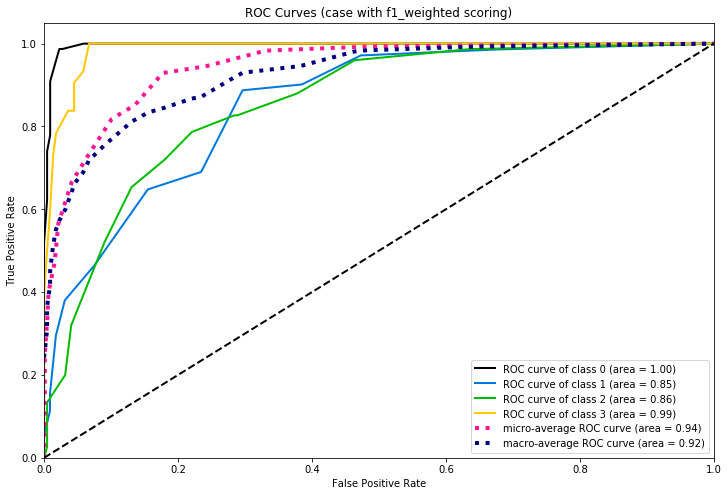

In [291]:
print("Scoring = {}\nBest parameters: {}".format("f1_weighted", clf.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("f1_weighted")
)

In [292]:
clf2 = find_params("accuracy")

Scoring = accuracy
Best parameters: {'Random_forest__max_depth': 14, 'Random_forest__n_estimators': 10}


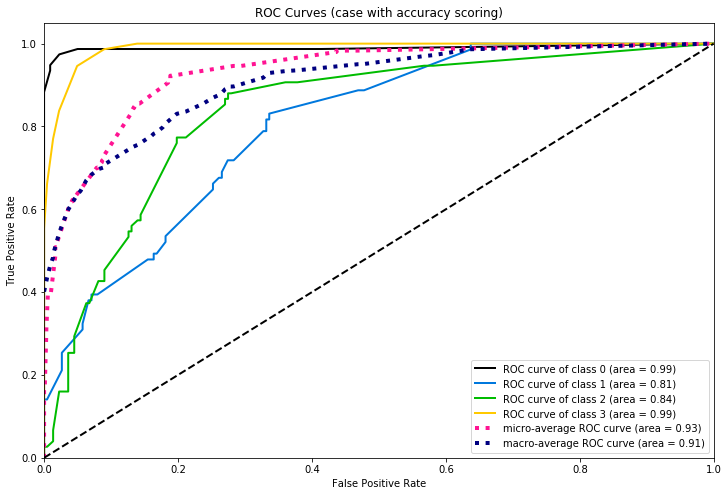

In [293]:
print("Scoring = {}\nBest parameters: {}".format("accuracy", clf2.best_params_))
scikitplot.metrics.plot_roc(
    y_test_new, 
    clf2.best_estimator_.predict_proba(X_test_new), 
    figsize=(12, 8), 
    title="ROC Curves (case with {} scoring)".format("accuracy")
)

We examined two hyperparameters together and got other results. Maximum depth is not much different, number of trees in ensemble is not different so much (from $10-15$ to $10-18$). This difference can arise because of search the best hyperparameters (in their case score can be not much different from other, but a little bit higher).

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [238]:
from sklearn.model_selection import KFold

In [239]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [240]:
clfs = {
    "logreg": LogisticRegression(
            multi_class='multinomial',
            solver='saga',
            tol=1e-3,
            max_iter=500,
            C=1.6,
            penalty='l1'
        ),
    "tree": DecisionTreeClassifier(
            max_depth=5
        ),
    "forest": RandomForestClassifier(
            max_depth=15,
            n_estimators=12
        )
}

f1 = {
    "logreg": [],
    "tree": [],
    "forest": []
}

acc = {
    "logreg": [],
    "tree": [],
    "forest": []
}

In [241]:
def calc_scores(name, part):
    clf = clfs[name]
    clf.fit(X_train_scaled[part], y_train_new[part])
    y_predicted = clf.predict(X_test_scaled)
    acc[name].append(accuracy_score(y_test_new, y_predicted))
    f1[name].append(f1_score(y_test_new, y_predicted, average="weighted"))

partitioner = KFold(n_splits=10)
split = partitioner.split(X_train, y_train)
used_part = []
for x, y in split:
    used_part.extend(y)
    calc_scores("logreg", used_part)
    calc_scores("tree", used_part)
    calc_scores("forest", used_part)

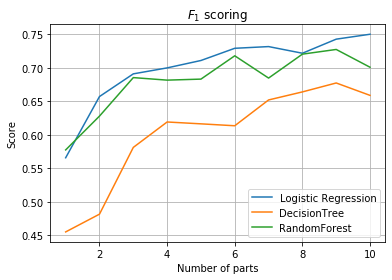

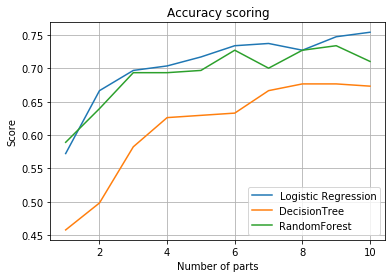

In [244]:
plt.figure(figsize=(6, 4))
plt.xlabel("Number of parts")
plt.ylabel("Score")
plt.title("$F_1$ scoring")
plt.plot(1 + np.arange(10), f1["logreg"], label='Logistic Regression')
plt.plot(1 + np.arange(10), f1["tree"], label='DecisionTree')
plt.plot(1 + np.arange(10), f1["forest"], label='RandomForest')
plt.grid()
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(6, 4))
plt.xlabel("Number of parts")
plt.ylabel("Score")
plt.title("Accuracy scoring")
plt.plot(1 + np.arange(10), acc["logreg"], label='Logistic Regression')
plt.plot(1 + np.arange(10), acc["tree"], label='DecisionTree')
plt.plot(1 + np.arange(10), acc["forest"], label='RandomForest')
plt.grid()
plt.legend(loc="best")
plt.show()

If number of parts is small then score is little. But if we increase it, the score will grow fast enough until a certain point (about $6-7$ parts of $10$) and then will not change as much as before. Due to working with large datasets it is good news for us: we can fit models on sets smaller than our and get result that do not differ much from the other one obtained on the full dataset.